<a href="https://colab.research.google.com/github/chdhatri/DrowsinessDetection/blob/main/YOLOv5_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15064, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 15064 (delta 66), reused 82 (delta 54), pack-reused 14961
Receiving objects: 100% (15064/15064), 13.65 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.


In [2]:
!cd yolov5 

In [4]:
!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 42.9 MB/s 


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-16 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbrUIIfJqLKHdBF6vlvUoUOgDu5iP0-TyiKQ&usqp=CAU'


In [8]:
results = model(img)
results.print()

image 1/1: 168x299 1 person, 11 cars, 2 buss, 3 trucks
Speed: 72.3ms pre-process, 45.6ms inference, 43.6ms NMS per image at shape (1, 3, 384, 640)


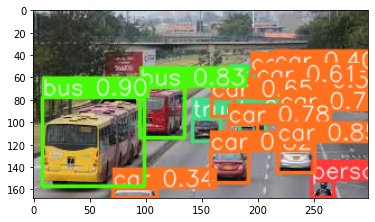

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [10]:
np.array(results.render()).shape

(1, 168, 299, 3)

In [11]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label):
  data = eval_js('stream_frame("{}")'.format(label))
  return data

In [12]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
from google.colab.patches import cv2_imshow 
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
while True:
    js_reply = video_frame(label_html)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    results = model(frame)
    cv2_imshow(np.squeeze(results.render()))

In [17]:
import uuid
import os
import time

In [18]:
IMAGES_PATH = os.path.join('/content/data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
from google.colab.patches import cv2_imshow 
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
while True:
    js_reply = video_frame(label_html)
    if not js_reply:
        break
    for label in labels:
      print('Collecting images for {}'.format(label))
      time.sleep(5)

      for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # convert JS response to OpenCV Image
        frame = js_to_image(js_reply["img"])

        img_name = os.path.join(IMAGES_PATH, label+str(img_num)+'.jpg')

        # Writes out image to file 
        cv2.imwrite(img_name, frame)

        # 2 second delay between captures
        time.sleep(2)

In [19]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/images/
  inflating: data/images/drowsy.2d83cf64-6558-11ed-99a5-3c15c2c9c6e6.jpg  
   creating: __MACOSX/data/images/
  inflating: __MACOSX/data/images/._drowsy.2d83cf64-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: data/images/awake.0f6aeddc-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: __MACOSX/data/images/._awake.0f6aeddc-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: data/images/awake.10a8697c-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: __MACOSX/data/images/._awake.10a8697c-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: data/images/awake.1808665e-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: __MACOSX/data/images/._awake.1808665e-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: data/images/awake.16cd23d8-6558-11ed-99a5-3c15c2c9c6e6.jpg  
  inflating: __MACOSX/data/images/._awake.16cd23d8

In [20]:
!cd /content/yolov5 

In [21]:
!pwd

/content


In [23]:
!python /content/yolov5/train.py --img 320 --batch 16 --epochs 300 --data /content/yolov5/dataset.yml --weights /content/yolov5s.pt --workers 2


train: weights=/content/yolov5s.pt, cfg=, data=/content/yolov5/dataset.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-245-g9057510 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp2/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-16 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [44]:
test_img = 'https://image.shutterstock.com/image-photo/sleepy-young-guy-yawns-while-600w-1275314314.jpg'

In [45]:
results = model(test_img)

In [46]:
results.print()

image 1/1: 420x600 1 drowsy
Speed: 388.8ms pre-process, 10.2ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)


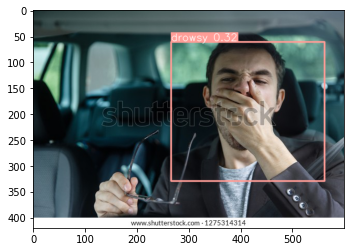

In [47]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()